# Time Series Analysis for Q4
Tutorial: https://colab.research.google.com/drive/1h7okvRLHCbIGocdHy_jfLdgPN2vOi9CV?usp=sharing

In [152]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [153]:
df_wind = pd.read_csv("ninja-wind-country-IE-current_total-merra2.csv", comment='#', header=None)
df_wind.head()

/tmp/ipykernel_28721/3030181279.py:1: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wind = pd.read_csv("ninja-wind-country-IE-current_total-merra2.csv", comment='#', header=None)


,0,1,2,3,4
0,"# Renewables.ninja Wind (current total fleet, ...",NaN,NaN,NaN,NaN
1,# Units: time in UTC; other columns are capaci...,NaN,NaN,NaN,NaN
2,"# {'units': {'time': 'UTC', 'NATIONAL': 'bias-...",NaN,NaN,NaN,NaN
3,time,NATIONAL,IE04,IE05,IE06
4,1980-01-01 00:00:00+00:00,0.145697,0.056425,0.224918,0.042835


In [154]:
for i in range(3):
    print(df_wind.iloc[i, 0])
    print("\n")

# Renewables.ninja Wind (current total fleet, country zones, hourly, 1980 - 2024)  -  Ireland  -  ninja_wind_countryzones_hourly_IE_current-total_merra2.csv  -  Version 1.4  -  License: https://creativecommons.org/licenses/by-nc/4.0/  -  Reference: https://doi.org/10.1016/j.energy.2016.08.068


# Units: time in UTC; other columns are capacity factors [0-1].  Column names signify country ISO2 code or NUTS2 code.  Simulation represents 4965 MW of capacity.  Bias corrected using national generation data.


# {'units': {'time': 'UTC', 'NATIONAL': 'bias-corrected capacity factor [0-1]', 'IE04': 'bias-corrected capacity factor [0-1]', 'IE05': 'bias-corrected capacity factor [0-1]', 'IE06': 'bias-corrected capacity factor [0-1]'}, 'country': 'Ireland', 'filename': 'ninja_wind_countryzones_hourly_IE_current-total_merra2.csv', 'version': '1.4', 'license': 'https://creativecommons.org/licenses/by-nc/4.0/', 'reference': 'https://doi.org/10.1016/j.energy.2016.08.068'}




In [155]:
w_capacity = 4000 # used to go from normalized values to absolute values

df_wind = df_wind.iloc[4:, :]
df_wind.head()
col = ['time', 'National', 'IE04', 'IE05', 'IE06']
df_wind.columns = col

In [156]:

df_wind.tail()

,time,National,IE04,IE05,IE06
394487,2024-12-31 19:00:00+00:00,0.566249,0.684685,0.468164,0.649192
394488,2024-12-31 20:00:00+00:00,0.506534,0.665317,0.374993,0.618031
394489,2024-12-31 21:00:00+00:00,0.476798,0.64879,0.33732,0.574653
394490,2024-12-31 22:00:00+00:00,0.460486,0.642585,0.315573,0.542981
394491,2024-12-31 23:00:00+00:00,0.424961,0.620224,0.273166,0.486031


In [157]:
df_wind24 = df_wind.iloc[-(366*24):, :]
df_wind24.head()

,time,National,IE04,IE05,IE06
385708,2024-01-01 00:00:00+00:00,0.556594,0.572887,0.527819,0.68458
385709,2024-01-01 01:00:00+00:00,0.507085,0.554988,0.454401,0.639926
385710,2024-01-01 02:00:00+00:00,0.450664,0.514465,0.384004,0.600814
385711,2024-01-01 03:00:00+00:00,0.396818,0.473042,0.323122,0.530836
385712,2024-01-01 04:00:00+00:00,0.358569,0.451013,0.274442,0.481047


In [158]:
wind_recordings = np.array(df_wind24['National'].astype('float').tolist()) * w_capacity

print(max(wind_recordings))
print(min(wind_recordings))
print(len(wind_recordings))


3924.044
8.092
8784


In [159]:
a = 24 #moving average wondow size
N = len(wind_recordings)
mvavg_wind24 = np.zeros(len(wind_recordings))
for i in range(a, N):
    mvavg_wind24[i] = sum(wind_recordings[i-a: i]) / a

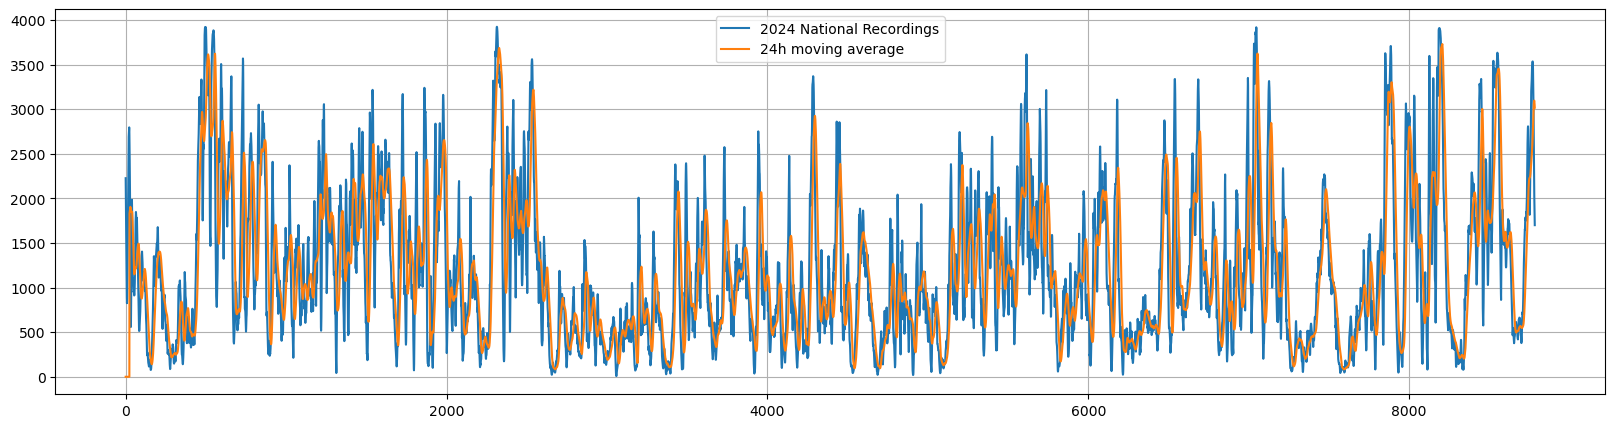

Maximum recorded wind speed: 3924.044
Minimum recorded wind speed: 8.092

Maximum moving average wind speed: 3729.968499999999
Minimum moving average wind speed: 84.00949999999999


In [160]:
plt.figure(figsize=(20, 5))
plt.plot(wind_recordings)
plt.plot(mvavg_wind24)
plt.legend(['2024 National Recordings', '24h moving average'])
plt.grid(True)
plt.show()

print("Maximum recorded wind power", max(wind_recordings))
print("Minimum recorded wind power:", min(wind_recordings))
print("\nMaximum moving average wind power:", max(mvavg_wind24[a:]))
print("Minimum moving average wind power:", min(mvavg_wind24[a:]))


In [161]:
df_wind24['National']

385708    0.556594
385709    0.507085
385710    0.450664
385711    0.396818
385712    0.358569
            ...   
394487    0.566249
394488    0.506534
394489    0.476798
394490    0.460486
394491    0.424961
Name: National, Length: 8784, dtype: object